# Animal type classifier project

The dataset is downloaded from: https://www.kaggle.com/datasets/alessiocorrado99/animals10/data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from keras.preprocessing import image

## Data pre-processing

In [37]:



raw_data_dir = 'raw-img'
train = 'train'
labels_csv_path = 'combined_labels.csv'

if os.path.exists("combined_labels.csv"):
    labels_df = pd.read_csv("combined_labels.csv")
else:
    os.makedirs(train, exist_ok=True)

    data = []

    for animal_type in os.listdir(raw_data_dir):
        animal_dir = os.path.join(raw_data_dir, animal_type)
        if os.path.isdir(animal_dir):
            for filename in os.listdir(animal_dir):
                if filename.lower().endswith('.jpeg'):
                    src_path = os.path.join(animal_dir, filename)
                    dst_path = os.path.join(train, filename)
                    
                    shutil.move(src_path, dst_path)
                    
                    data.append([filename, animal_type])

    labels_df = pd.DataFrame(data, columns=['id', 'animal_type'])

    labels_df.to_csv(labels_csv_path, index=False)

print(labels_df.head())


                                    id animal_type
0  OIP--04ndbWy7I04gsPgu9qOeQHaHs.jpeg   butterfly
1  OIP--3xxJkezSkNzxrQaxlhv-QHaHa.jpeg   butterfly
2  OIP--4zW12JF-JpwKcDtEK7thgHaLC.jpeg   butterfly
3  OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg   butterfly
4  OIP--8RSoaU1iEvZhemy7FlYegHaD9.jpeg   butterfly


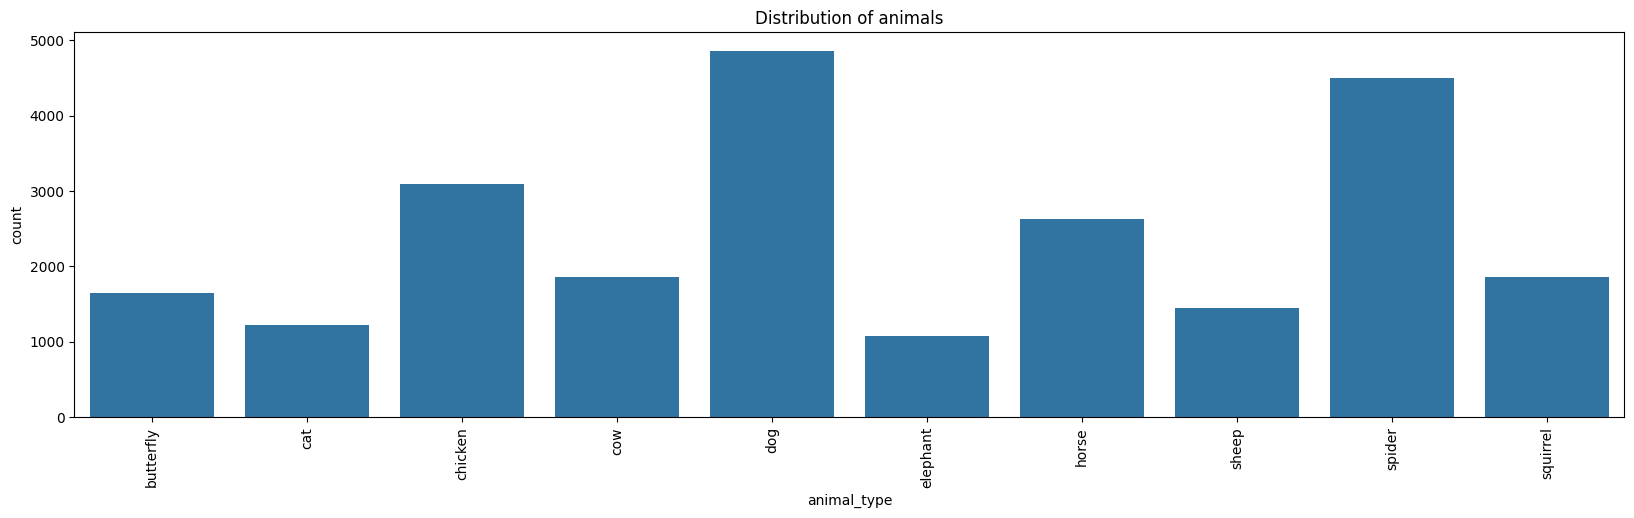

In [38]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(data=labels_df, x='animal_type')
plt.title('Distribution of animals')
plt.show()

## Splitting the data and creating the data generators

In [39]:

RANDOM_STATE = 42
train_df, test_df = train_test_split(labels_df, test_size=0.1, random_state=RANDOM_STATE)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=RANDOM_STATE)

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SIZE = (250,250)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(train_df, 'train', 'id', 'animal_type', target_size=SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = test_datagen.flow_from_dataframe(test_df, 'train', 'id', 'animal_type', target_size=SIZE, batch_size=BATCH_SIZE, class_mode='categorical')
val_generator = val_datagen.flow_from_dataframe(val_df, 'train', 'id', 'animal_type', target_size=SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

Found 17430 validated image filenames belonging to 10 classes.
Found 2421 validated image filenames belonging to 10 classes.
Found 4358 validated image filenames belonging to 10 classes.


## Creating the CNN

In [41]:

input_shape = (250, 250, 3)

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\iliad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 248, 248, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 124, 124, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 122, 122, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 59, 59, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │     1,722,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748,666 (6.67 MB)

 Trainable params: 1,748,666 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model and determining the accuracy on the test set

In [42]:
epochs = 10

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=epochs,
                    )

Epoch 1/10


c:\Users\iliad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


545/545 ━━━━━━━━━━━━━━━━━━━━ 452s 826ms/step - accuracy: 0.2568 - loss: 2.0828 - val_accuracy: 0.4110 - val_loss: 1.7136
Epoch 2/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 440s 807ms/step - accuracy: 0.4061 - loss: 1.7232 - val_accuracy: 0.4963 - val_loss: 1.4481
Epoch 3/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 568s 1s/step - accuracy: 0.4821 - loss: 1.4996 - val_accuracy: 0.5397 - val_loss: 1.3342
Epoch 4/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 511s 935ms/step - accuracy: 0.5443 - loss: 1.3242 - val_accuracy: 0.5865 - val_loss: 1.2448
Epoch 5/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 494s 907ms/step - accuracy: 0.5866 - loss: 1.1770 - val_accuracy: 0.5925 - val_loss: 1.2482
Epoch 6/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 515s 945ms/step - accuracy: 0.6341 - loss: 1.0404 - val_accuracy: 0.6035 - val_loss: 1.2248
Epoch 7/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 491s 901ms/step - accuracy: 0.6843 - loss: 0.9037 - val_accuracy: 0.6147 - val_loss: 1.1973
Epoch 8/10
545/545 ━━━━━━━━━━━━━━━━━━━━ 454s 833ms/step - accuracy: 0.7115 - loss: 0.7877 

In [43]:
score = model.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 314ms/step - accuracy: 0.5996 - loss: 1.4354
Test loss: 1.4963911771774292
Test accuracy: 0.5885997414588928


# Visualizing the accuracy over the different epochs

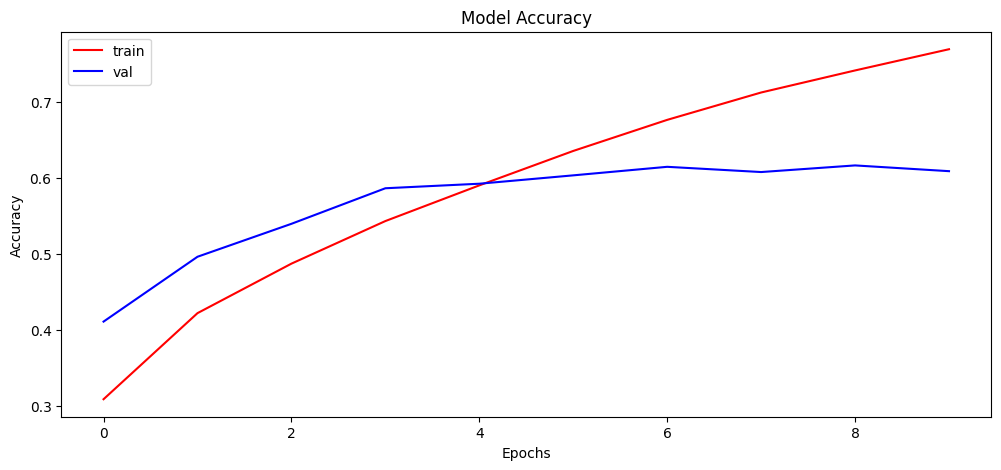

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

### By inspecting the plot above, we can see that at around the 6-7 epoch the model is starting to overfit

# Creating a confusion matrix

76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step


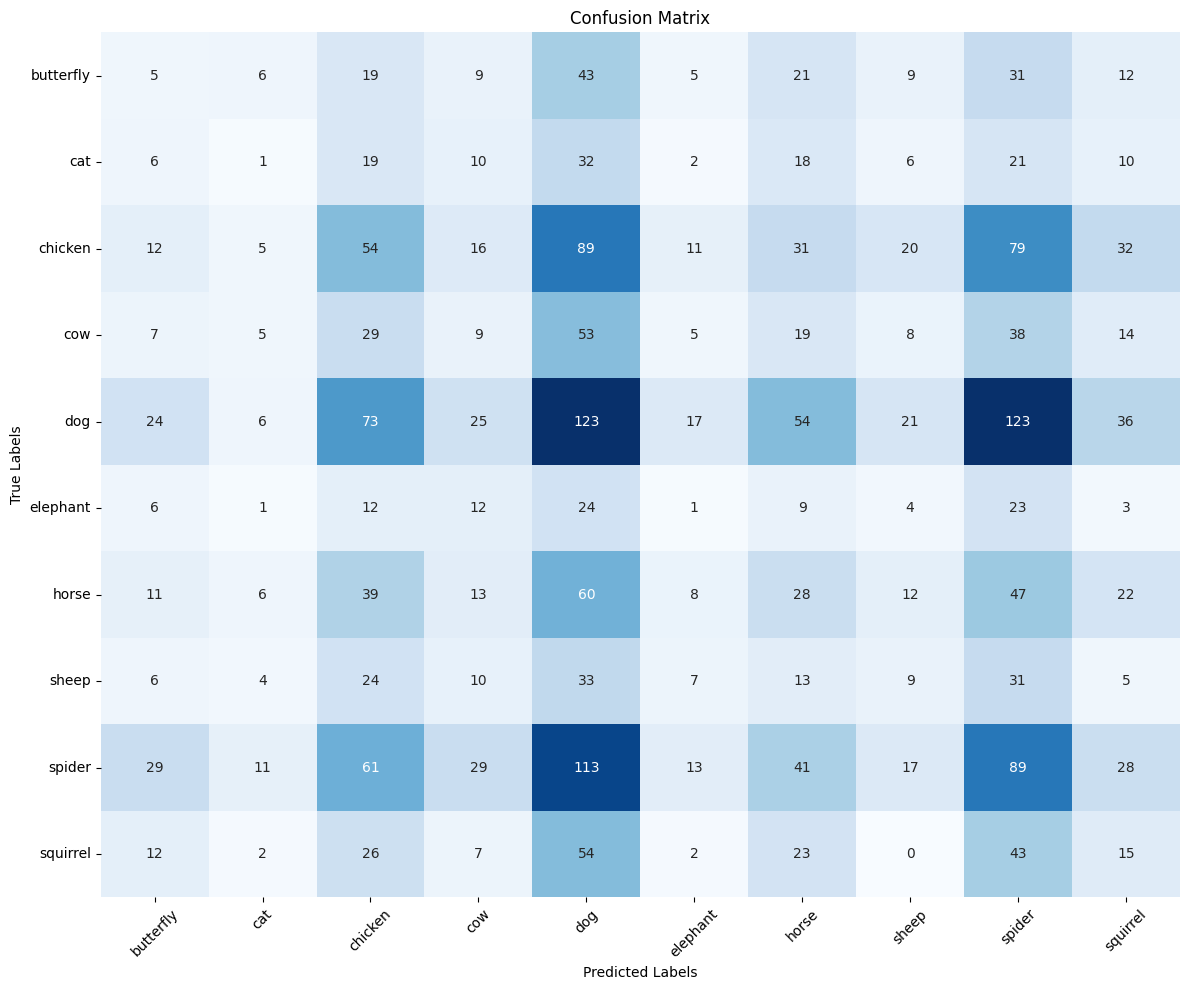

In [51]:

from sklearn.metrics import confusion_matrix


# Step 1: Make predictions on the test set
Y_pred = model.predict(test_generator)

# Step 2: Convert predicted probabilities to class labels
y_pred = np.argmax(Y_pred, axis=1)

# Step 3: Calculate confusion matrix
conf_matrix = confusion_matrix(test_generator.classes, y_pred)

# Step 5: Visualize confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(test_generator.class_indices)) + 0.5, test_generator.class_indices.keys(), rotation=45)
plt.yticks(np.arange(len(test_generator.class_indices)) + 0.5, test_generator.class_indices.keys(), rotation=0)
plt.tight_layout()
plt.show()



### This matrix shows that the model struggles with distinguishing some types of animals, such as cats and elephants, and often confuses certain types with dogs, spiders, and raccoons. However, there is an improvement in the classification of some categories like spiders and chickens.